In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
toyota= pd.read_csv("Toyoto_Corrola.csv")
toyota.head()

,Id,Model,Price,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Weight,Quarterly_Tax
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,4,5,1165,210
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,4,5,1165,210
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,4,5,1165,210
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,4,5,1165,210
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,4,5,1170,210


In [4]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1436 non-null   int64 
 1   Model          1436 non-null   object
 2   Price          1436 non-null   int64 
 3   Age_08_04      1436 non-null   int64 
 4   KM             1436 non-null   int64 
 5   HP             1436 non-null   int64 
 6   cc             1436 non-null   int64 
 7   Doors          1436 non-null   int64 
 8   Cylinders      1436 non-null   int64 
 9   Gears          1436 non-null   int64 
 10  Weight         1436 non-null   int64 
 11  Quarterly_Tax  1436 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 134.8+ KB


In [5]:
toyota.isna().sum()

Id               0
Model            0
Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Cylinders        0
Gears            0
Weight           0
Quarterly_Tax    0
dtype: int64

In [6]:
toyota.corr()

,Id,Price,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Weight,Quarterly_Tax
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.117704,-0.130207,NaN,-0.043343,-0.414500,-0.240821
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,NaN,0.063104,0.581198,0.219197
Age_08_04,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,NaN,-0.005364,-0.470253,-0.198431
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,NaN,0.015023,-0.028598,0.278165
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,NaN,0.209477,0.089614,-0.298432
cc,-0.117704,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,NaN,0.014629,0.335637,0.306996
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,NaN,-0.160141,0.302618,0.109363
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.043343,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,NaN,1.000000,0.020613,-0.005452
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,NaN,0.020613,1.000000,0.626134


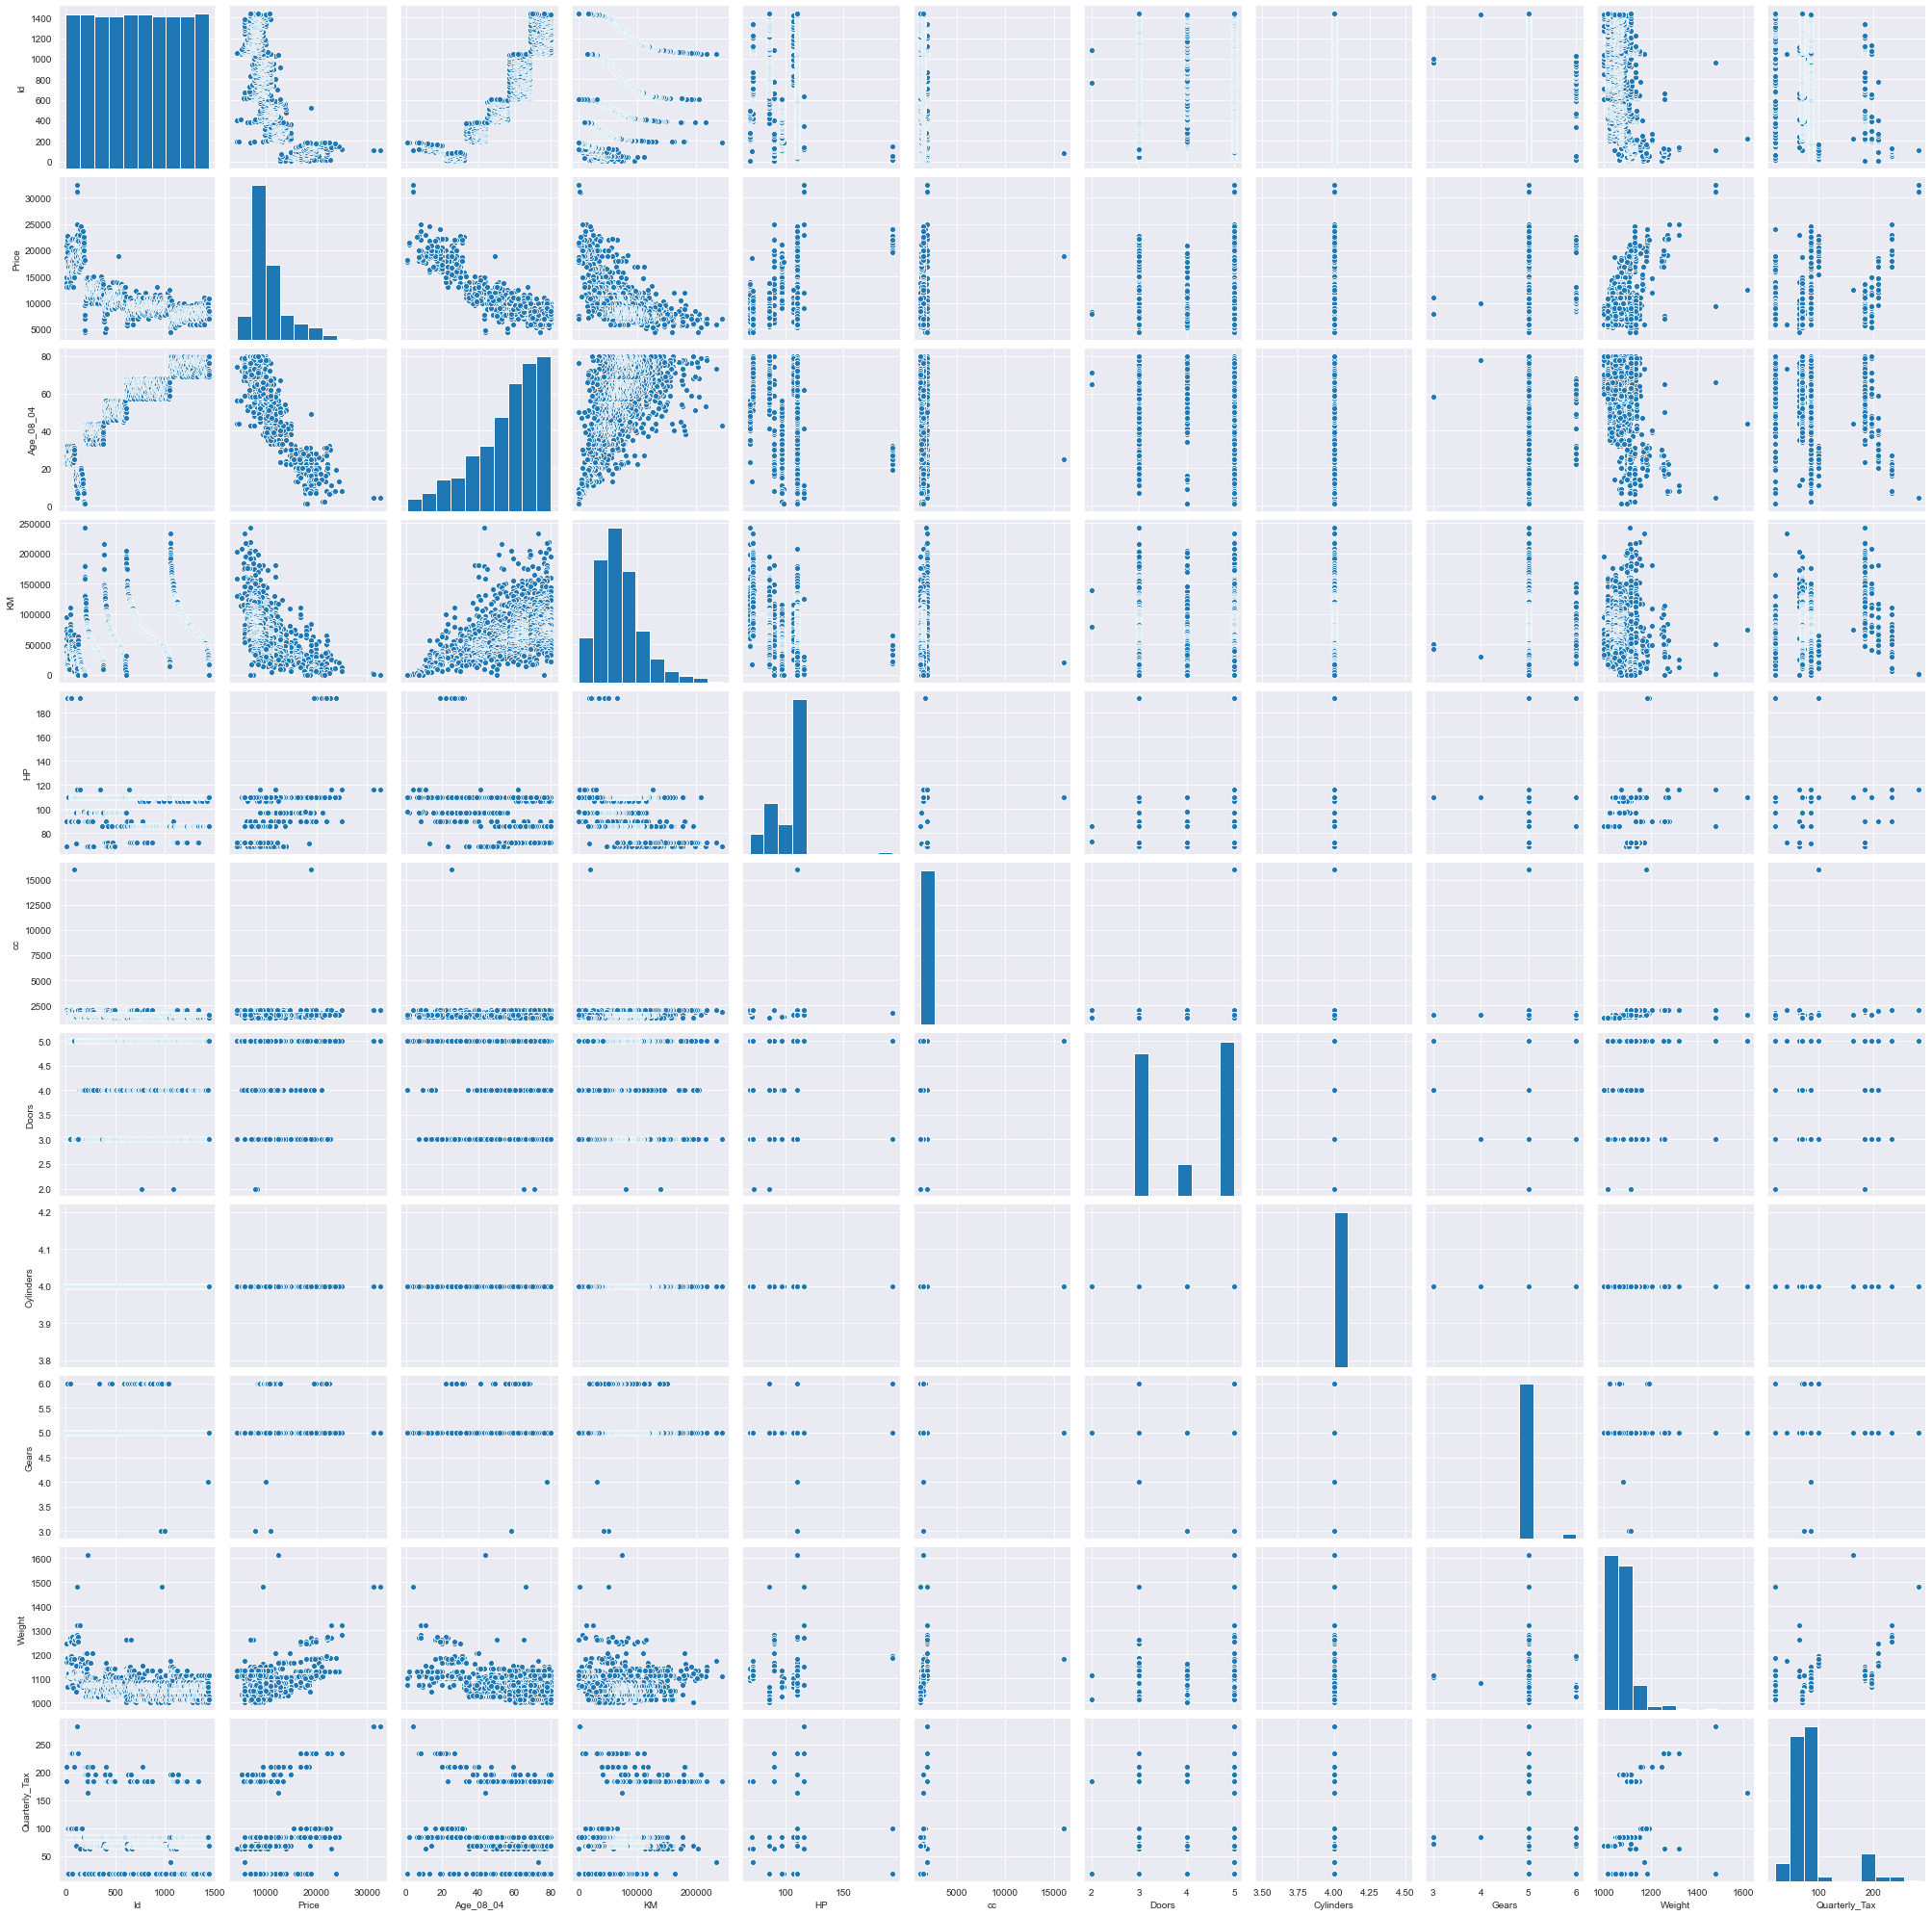

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota)

In [22]:
model = smf.ols('Price~	Age_08_04+KM+HP+cc+Doors+Gears+Weight+Quarterly_Tax',data=toyota).fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 20 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:57:58   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
m1=smf.ols("Price~Age_08_04",data=toyota).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Tue, 20 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:56:48   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
Age_08_04   -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
import statsmodels.api as sm

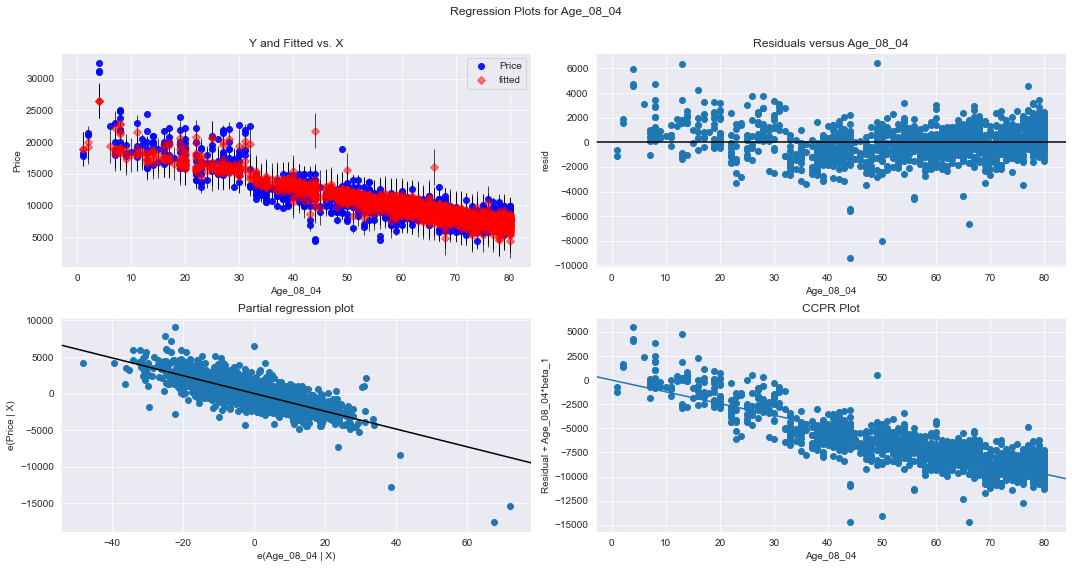

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

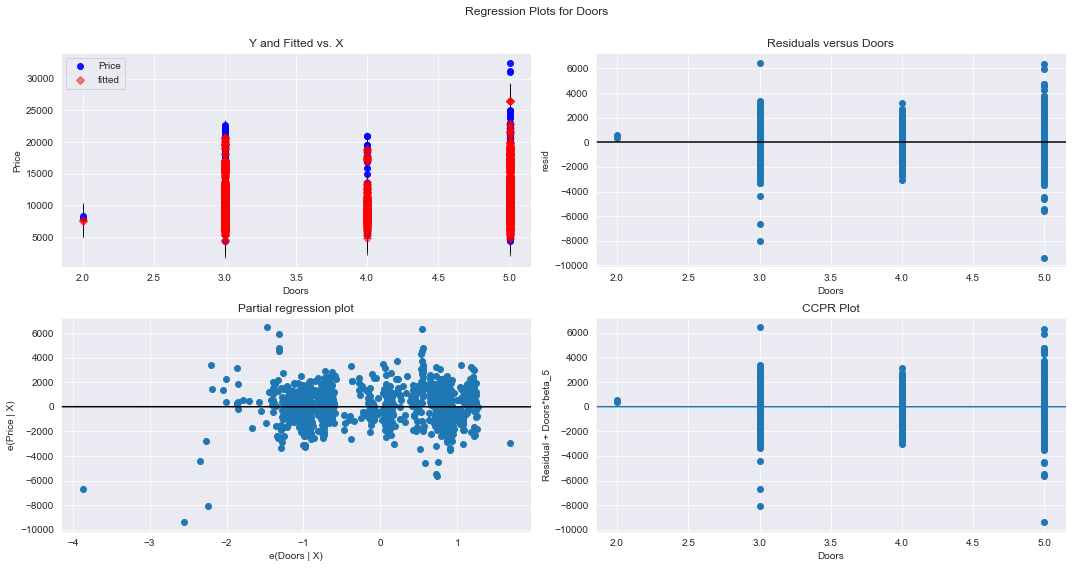

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

In [30]:
m2=smf.ols("Price~Doors",data=toyota).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           1.46e-12
Time:                        12:02:22   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

SO we remove doors and perform the model


In [31]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-33-3130876d8a2b>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(toyota)), np.round(c, 3))


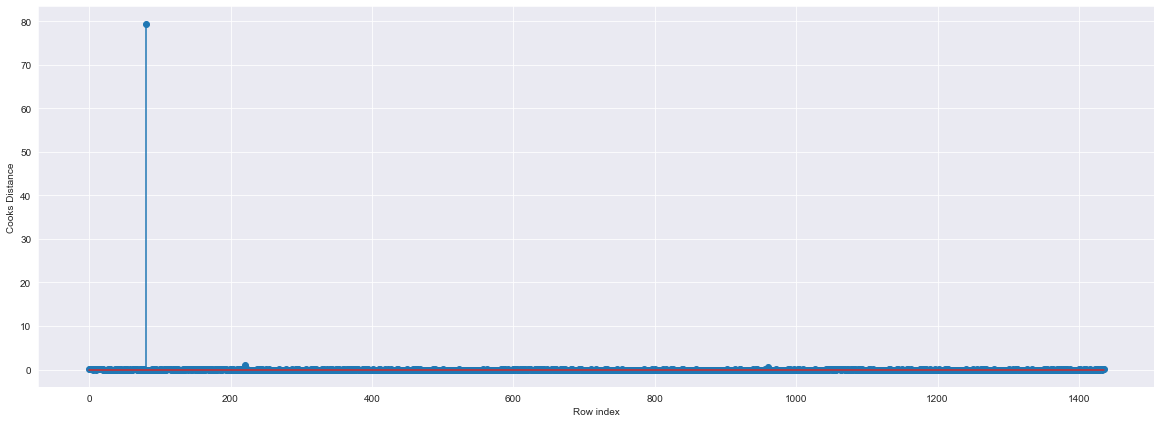

In [33]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

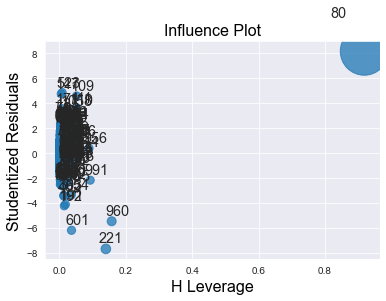

In [34]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [35]:
toyota[toyota.index.isin([80])]

,Id,Model,Price,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Weight,Quarterly_Tax
80,81,TOYOTA Corolla 1.6 5drs 1 4/5-Doors,18950,25,20019,110,16000,5,4,5,1180,100


In [36]:
model2=toyota.drop(toyota.index[[80]],axis=0).reset_index()

In [37]:
finalmodel = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Weight+Quarterly_Tax',data=model2).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1356.
Date:                Tue, 20 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:11:40   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6313.9396   1381.857     -4.569      0.000   -9024.628   -3603.251
Age_08_04      -120.4577      2.561    -47.031      0.000    -125.482    -115.433
KM               -0.0179      0.001    -14.029      0.000      -0.020      -0.015
HP               39.1593      2.898     13.512      0.000      33.474      44.844
cc               -2.5069      0.306     -8.188      0.000      -3.107      -1.906
Gears           549.7311    189.216      2.905      0.004     178.561     920.902
Weight           19.9623      1.076     18.547      0.000      17.851      22.074
Quarterly_Tax     9.0759      1.424      6.374      0.000       6.283      11.869
==============================================================================
Omnibus:                      239.713   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2556.740
Skew:                          -0.425   Prob(JB):                         0.00
Kurtosis:                       9.484   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

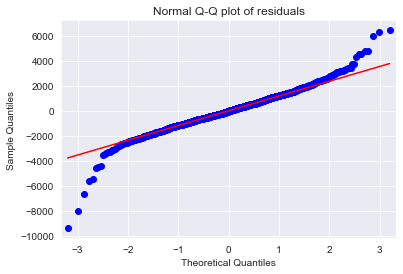

In [38]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

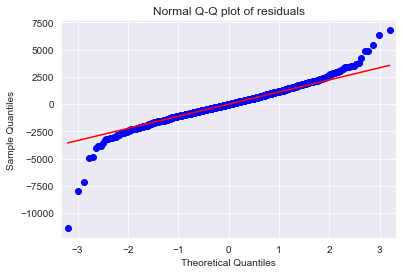

In [39]:
import statsmodels.api as sm
qqplot=sm.qqplot(finalmodel.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [40]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

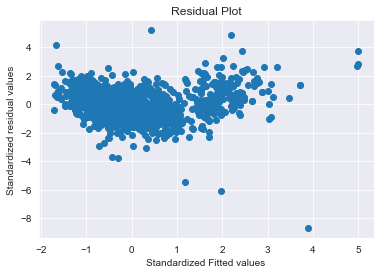

In [41]:
plt.scatter(get_standardized_values(finalmodel.fittedvalues),
            get_standardized_values(finalmodel.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(model2,test_size=0.2)

In [43]:
def RMSE (pred,actual):
    return np.sqrt(np.mean((actual-pred)**2))

In [44]:
trainmodel=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Weight+Quarterly_Tax',data = train_data).fit()
predtrain=trainmodel.predict(train_data)
actualtrain=train_data.Price
rmse_train=RMSE(predtrain,actualtrain)
rmse_train

1314.6967995138089

In [45]:
testmodel=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Weight+Quarterly_Tax',data = test_data).fit()
predtest=testmodel.predict(test_data)
actualtest=test_data.Price
rmse_test=RMSE(predtest,actualtest)
rmse_test

1254.4790787654472

CONCLUSION: we performed all logical function of all inputs administration is always related with profit so we need to remove that input. after removing that input and some outliers we build the model R squared greater than previous model.AIC BIC values are lesser than previous model.ATlast build a model then check for train and test data model is moreover fitted